In [9]:
import os
import sys
import random
import warnings

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

from tqdm import tqdm_notebook as tqdm
from itertools import chain
from skimage.io import imread, imshow, imread_collection, concatenate_images
from skimage.transform import resize
from skimage.morphology import label
from keras.layers.normalization import BatchNormalization
from keras.models import Model, load_model
from keras.layers import Input
from keras.layers.core import Dropout, Lambda
from keras.layers.convolutional import Conv2D, Conv2DTranspose, UpSampling2D
from keras.layers.pooling import MaxPooling2D
from keras.layers.merge import concatenate
from keras.callbacks import EarlyStopping, ModelCheckpoint,LearningRateScheduler
from keras.preprocessing.image import ImageDataGenerator
from keras import backend as K
import tensorflow as tf
from PIL import Image

Using TensorFlow backend.


The goal of this project is the automatice prediction of lesion segmentation boundaries within dermoscopic images. 
I have decided to use Keras as it as an easy prototyping deep learning library, my segmentation model will be base on the famouse medical imaging segmentation by Olaf Ronneberger "U-Net: Convolutional Networks for Biomedical Image Segmentation"(https://arxiv.org/abs/1505.04597)


In [11]:
 ###higher pixel value such as 256 or higher may yeild better results but due to hardware limitation on my current machine\
### 128 is the most it can handle.

IMG_WIDTH = 128   
IMG_HEIGHT = 128
IMG_CHANNELS = 3
MASK_PATH = 'C://Users//sahan//ipthw//Melanoma_segmentation//data//mask'
Image_PATH = 'C://Users//sahan//ipthw//Melanoma_segmentation//data//train'
VALID_PATH = 'C://Users//sahan//ipthw//Melanoma_segmentation//data//val'
Test_PATH = 'C://Users//sahan//ipthw//Melanoma_segmentation//data//test'
warnings.filterwarnings('ignore', category=UserWarning, module='skimage')
seed = 42
random.seed = seed
np.random.seed = seed

In [12]:
### extracting image ids
mask_ids = next(os.walk(MASK_PATH))[2]
image_ids = next(os.walk(Image_PATH))[2]
val_ids = next(os.walk(VALID_PATH))[2]
test_ids = next(os.walk(Test_PATH))[2]
len(test_ids)

1000

In [ ]:
### creating a dummy input numpy array of 0s with size ( number of images, image hight, image_width, rgb channels)


Since Mask images are encoded as single-channel (grayscale) 8-bit PNGs , where each pixel is either:
0: representing the background of the image, or areas outside the primary lesion
255: representing the foreground of the image; a dummy numpy array is created with and a bool variable to show whether that pixel is a lesion or not.

In [ ]:
### creating a dummy input numpy array of 0s with size ( number of images, image hight, image_width, rgb channels)
val_test = np.zeros((len(val_ids), IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.float32)

In [ ]:
test = np.zeros((len(test_ids), IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.float32)

All the images of training, Mask, Validation, and test folder,  are read into the numpy arrays and resized and fed into the relevent dummy matrix created earlier. Also All resized images are saved to be used as 

In [ ]:

###for n, id_ in tqdm(enumerate(image_ids), total=len(image_ids)):
    ###path = Image_PATH
    ###img = imread(path + '//' + id_)[:,:,:IMG_CHANNELS]
    ###img = resize(img, (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=False)
   
    ###matplotlib.image.imsave('C://Users//sahan//ipthw//Melanoma_segmentation//data//resized_train//'+ id_, img)
    
    

In [ ]:
###for n, id_ in tqdm(enumerate(mask_ids), total=len(image_ids)):
    ###mask_ = imread(MASK_PATH +'//'+id_)
    ###mask_ = np.expand_dims(resize(mask_, (IMG_HEIGHT, IMG_WIDTH), mode='constant', 
                                      ###preserve_range=False), axis=-1)
    ###np.save('C://Users//sahan//ipthw//Melanoma_segmentation//data//resized_mask//'+ id_, mask_)
   

In [ ]:

###for n, id_ in tqdm(enumerate(val_ids), total=len(val_ids)):
    ###path = VALID_PATH
    ###img = imread(path + '//'+  id_)[:,:,:IMG_CHANNELS]
    ###img = resize(img, (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=False)
    ###matplotlib.image.imsave('C://Users//sahan//ipthw//Melanoma_segmentation//data//resized_val//'+ id_,img)
    ###val_test[n] = img

###print('Done!')

In [ ]:

###for n, id_ in tqdm(enumerate(test_ids), total=len(test_ids)):
    ###path = Test_PATH
    ###img = imread(path + '//'+  id_)[:,:,:IMG_CHANNELS]
    ###img = resize(img, (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=False)
    ###matplotlib.image.imsave('C://Users//sahan//ipthw//Melanoma_segmentation//data//resized_test//'+ id_,img)
    ###test[n] = img

###print('Done!')

In [ ]:
import os
import random
import numpy as np
from skimage.transform import *
from skimage.io import imsave, imread


# In[33]:


def aug_rotate(image, deg):
    return rotate(image, deg)

def aug_flipud(image):
    return np.flipud(image)

def aug_fliplr(image):
    return np.fliplr(image)

def aug_translatex(image, x):
    return warp(image, EuclideanTransform(translation=(x, 0)))

def aug_translatey(image, y):
    return warp(image, EuclideanTransform(translation=(0, y)))




images = os.listdir('C://Users//sahan//ipthw//Melanoma_segmentation//data')

augmentations = [
    aug_rotate,
    aug_flipud,
    aug_fliplr,
    aug_translatex,
    aug_translatey
]

translate_range = list(range(-51, 0)) + list(range(1, 52))

count = 0
for id_ in image_ids:
    id_ = id_.split('.')[0]
    image = imread('C://Users//sahan//ipthw//Melanoma_segmentation//data//train//' + id_+'.jpg')
    mask = imread('C://Users//sahan//ipthw//Melanoma_segmentation//data//mask//' + id_+ '_segmentation.png')

    imsave('C://Users//sahan//ipthw//Melanoma_segmentation//data//train//' + id_ + '.jpg', image)
    imsave('C://Users//sahan//ipthw//Melanoma_segmentation//data//mask//' + id_ + '_segmentation.png', mask)

    samples = random.sample(range(5), 4)
    rotate_deg = random.randint(45, 315)
    translatex = random.choice(translate_range)
    translatey = random.choice(translate_range)
    for (i, aug_idx) in enumerate(samples):

        if aug_idx == 1 or aug_idx == 2:
            aug_image = augmentations[aug_idx](image)
            aug_mask = augmentations[aug_idx](mask)

        if aug_idx == 0:
            aug_image = augmentations[aug_idx](image, rotate_deg)
            aug_mask = augmentations[aug_idx](mask, rotate_deg)
        if aug_idx == 3:
            aug_image = augmentations[aug_idx](image, translatex)
            aug_mask = augmentations[aug_idx](mask, translatex)
        if aug_idx == 4:
            aug_image = augmentations[aug_idx](image, translatey)
            aug_mask = augmentations[aug_idx](mask, translatey)

        imsave('C://Users//sahan//ipthw//Melanoma_segmentation//data//aug_train//' + id_ + '_' + str(i) + '.jpg', aug_image)
        imsave('C://Users//sahan//ipthw//Melanoma_segmentation//data//aug_mask//' + id_ + '_' + str(i) + '_segmentation.jpg', aug_mask)
    count += 1
    if count % 100 == 0:
        print(count)

In [54]:
IMG_WIDTH = 128   
IMG_HEIGHT = 128
IMG_CHANNELS = 3
image_aug_ids = next(os.walk('C://Users//sahan//ipthw//Melanoma_segmentation//data//aug_train//'))[2]
for n, id_ in tqdm(enumerate(image_aug_ids), total=len(image_aug_ids)):
    path = 'C://Users//sahan//ipthw//Melanoma_segmentation//data//aug_train//'
    img = imread(path + '//' + id_)[:,:,:IMG_CHANNELS]
    img = resize(img, (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=False)
   
    matplotlib.image.imsave('C://Users//sahan//ipthw//Melanoma_segmentation//data//resized_aug_train_128//'+ id_, img)
    


In [55]:
mask_aug_ids = next(os.walk('C://Users//sahan//ipthw//Melanoma_segmentation//data//aug_mask//'))[2]
for n, mask in tqdm(enumerate(mask_aug_ids), total=len(mask_aug_ids)):
    Mask_aug_path = 'C://Users//sahan//ipthw//Melanoma_segmentation//data//aug_mask//'
    mask_ = imread(Mask_aug_path +mask)
    mask_ = np.expand_dims(resize(mask_, (IMG_HEIGHT, IMG_WIDTH), mode='constant', 
                                      preserve_range=False), axis=-1)
    np.save('C://Users//sahan//ipthw//Melanoma_segmentation//data//resized_aug_mask_128//'+mask, mask_)
       

In [13]:
image_aug_ids = next(os.walk('C://Users//sahan//ipthw//Melanoma_segmentation//data//aug_train//'))[2]
mask_aug_ids = next(os.walk('C://Users//sahan//ipthw//Melanoma_segmentation//data//aug_mask//'))[2]

In [14]:
X_train = np.zeros((len(image_aug_ids), IMG_HEIGHT, IMG_WIDTH,IMG_CHANNELS), dtype=np.float32)
Y_train = np.zeros((len(mask_aug_ids), IMG_HEIGHT, IMG_WIDTH, 1), dtype=np.bool)
import cv2 
for n, id_ in tqdm(enumerate(image_aug_ids), total=len(image_aug_ids)):
    path ='C://Users//sahan//ipthw//Melanoma_segmentation//data//resized_aug_train_128//'
    img = cv2.imread(path + id_)
    X_train[n] = img
for n, id_ in tqdm(enumerate(mask_aug_ids), total=len(mask_aug_ids)):
    
    Mask_aug_path_resized ='C://Users//sahan//ipthw//Melanoma_segmentation//data//resized_aug_mask_128//' 
    mask_ = np.load(Mask_aug_path_resized +id_+'.npy')
    Y_train[n] = mask_    

In [15]:
X_train.shape

(10376, 128, 128, 3)

In [6]:
image_aug_ids = next(os.walk('C://Users//sahan//ipthw//Melanoma_segmentation//data//aug_train//'))[2]
mask_aug_ids = next(os.walk('C://Users//sahan//ipthw//Melanoma_segmentation//data//aug_mask//'))[2]

In [22]:
X_train = np.zeros((len(image_aug_ids), 224, 224,3), dtype=np.float32)
Y_train = np.zeros((len(mask_aug_ids), 224, 224,3), dtype=np.float32)
for n, id_ in tqdm(enumerate(image_aug_ids), total=len(image_aug_ids)):
    path ='data/feature_train_224/'
    img = np.load(path + id_+'.npy')
    X_train[n] = img
for n, id_ in tqdm(enumerate(mask_aug_ids), total=len(mask_aug_ids)):
    path='data/feature_mask_224/'
    mask_ = np.load(path+id_+'.npy')
    Y_train[n] = mask_
    
print(len(Y_train))    
from keras.applications.mobilenet import MobileNet
feature_extractor= MobileNet(weights='imagenet', include_top=False)
feature_X = feature_extractor.predict(X_train)
feature_Y = feature_extractor.predict(Y_train)
print(len(feature_X))
print(feature_X.size)



10376


C:\Users\sahan\Anaconda3\lib\site-packages\keras_applications\mobilenet.py:208: UserWarning: MobileNet shape is undefined. Weights for input shape (224, 224) will be loaded.
  warnings.warn('MobileNet shape is undefined.'


10376
520626176


In [23]:
feature_X.shape

(10376, 7, 7, 1024)

In [24]:
(10376-9338)/6

173.0

In [27]:
IMG_WIDTH = 128
IMG_HEIGHT = 128
IMG_CHANNELS = 3
feature_X.resize(feature_X.shape[0], IMG_WIDTH, IMG_HEIGHT, IMG_CHANNELS)
feature_Y.resize(feature_Y.shape[0], IMG_WIDTH, IMG_HEIGHT, 1)
feature_X.shape


(10376, 128, 128, 3)

In [28]:
feature_Y.shape

(10376, 128, 128, 1)

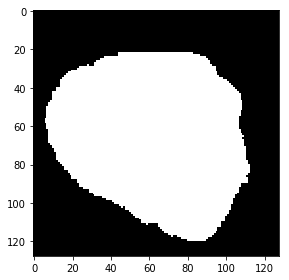

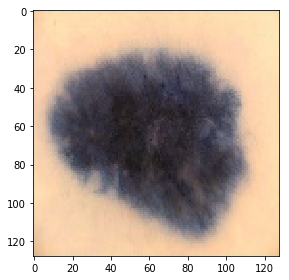

(128, 128, 1)


In [57]:
#testing weather preporcessing this images where successful

imshow(np.squeeze(Y_train[1]))
plt.show()
imshow((X_train[1]).astype(np.uint8))
plt.show()
print(Y_train[1].shape)

In [58]:

def dice_coef(y_true, y_pred):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + 1) / (K.sum(y_true_f) + K.sum(y_pred_f) + 1)

# Loss funtion
def dice_coef_loss(y_true, y_pred):
    return -dice_coef(y_true, y_pred)

In [59]:
###For each image, a pixel-wise comparison of each predicted segmentation with the corresponding ground truth segmentation\
###is made using the Jaccard index.

def jaccard(y_true, y_pred, smooth=1.):
    y_true = K.flatten(y_true)
    y_pred = K.flatten(y_pred)
    intersection = K.sum(y_true * y_pred)
    sum_ = K.sum(y_true) + K.sum(y_pred)
    jac = (intersection + smooth) / (sum_ - intersection + smooth)
    return jac

def lossfunc(y_true, y_pred):
    return - 1 * jaccard(y_true, y_pred)
    # return - 0.7 * jaccard(y_true, y_pred) - 0.3 * dice(y_true, y_pred)


In [60]:
### Unet model from https://github.com/zhixuhao/unet
def unet(IMG_WIDTH=256,IMG_HEIGHT=256,IMG_CHANNELS=3):
    inputs = Input((IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))
    s = Lambda(lambda x: x / 255) (inputs)
    conv1 = Conv2D(64, 3, activation='relu', padding='same')(inputs)
    conv1 = BatchNormalization(axis=3)(conv1)
    conv1 = Conv2D(64, 3, activation='relu', padding='same')(conv1)
    conv1 = BatchNormalization(axis=3)(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    
    conv2 = Conv2D(128, 3, activation='relu', padding='same')(pool1)
    conv2 = BatchNormalization(axis=3)(conv2)
    conv2 = Conv2D(128, 3, activation='relu', padding='same')(conv2)
    conv2 = BatchNormalization(axis=3)(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
    
    conv3 = Conv2D(256, 3, activation='relu', padding='same')(pool2)
    conv3 = BatchNormalization(axis=3)(conv3)
    conv3 = Conv2D(256, 3, activation='relu', padding='same')(conv3)
    conv3 = BatchNormalization(axis=3)(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3) 
    
    conv4 = Conv2D(512, 3, activation='relu', padding='same')(pool3)
    conv4 = BatchNormalization(axis=3)(conv4)
    conv4 = Conv2D(512, 3, activation='relu', padding='same')(conv4)
    conv4 = BatchNormalization(axis=3)(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(Dropout(0.2)(conv4))
    
    conv5 = Conv2D(1024, 3, activation='relu', padding='same')(pool4)
    conv5 = BatchNormalization(axis=3)(conv5)
    conv5 = Conv2D(1024, 3, activation='relu', padding='same')(conv5)
    conv5 = BatchNormalization(axis=3)(conv5)
    
    middle = Dropout(0.2)(conv5)
    

    up6 = Conv2D(512, 2, activation='relu', padding='same')(UpSampling2D()(middle)) 
    up6 = BatchNormalization(axis=3)(up6) 
    concat6 = concatenate([conv4, up6])
    conv6 = Conv2D(512, 3, activation='relu', padding='same')(concat6)
    conv6 = BatchNormalization(axis=3)(conv6)
    conv6 = Conv2D(512, 3, activation='relu', padding='same')(conv6)
    conv6 = BatchNormalization(axis=3)(conv6)
   
   
    
    up7 = Conv2D(256, 2, activation='relu', padding='same')(UpSampling2D()(conv6))
    up7 = BatchNormalization(axis=3)(up7)
    concat7 = concatenate([conv3, up7])
    conv7 = Conv2D(256, 3, activation='relu', padding='same')(concat7)
    conv7 = BatchNormalization(axis=3)(conv7)
    conv7 = Conv2D(256, 3, activation='relu', padding='same')(conv7)
    conv7 = BatchNormalization(axis=3)(conv7)

    
    
    up8 = Conv2D(128, 2, activation='relu', padding='same')(UpSampling2D()(conv7)) 
    up8 = BatchNormalization(axis=3)(up8)
    concat8 = concatenate([conv2, up8])
    conv8 = Conv2D(128, 3, activation='relu', padding='same')(concat8)
    conv8 = BatchNormalization(axis=3)(conv8)
    conv8 = Conv2D(128, 3, activation='relu', padding='same')(conv8)
    conv8 = BatchNormalization(axis=3)(conv8)

    
    
    up9 = Conv2D(64, 2, activation='relu', padding='same')(UpSampling2D()(conv8)) 
    up9 = BatchNormalization(axis=3)(up9)
    concat9 = concatenate([conv1, up9])
    conv9 = Conv2D(64, 3, activation='relu', padding='same')(concat9)
    conv9 = BatchNormalization(axis=3)(conv9)
    conv9 = Conv2D(64, 3, activation='relu', padding='same')(conv9)
    conv9 = BatchNormalization(axis=3)(conv9)

    
    conv10 = Conv2D(1, 1, activation='sigmoid', padding='same')(conv9)
    
    model = Model(inputs=[inputs], outputs=[conv10])
    
    model.compile(optimizer=Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=True),loss='binary_crossentropy', metrics=[jaccard])

    return model

In [61]:
from keras.optimizers import RMSprop, Adam
model = unet()
lr_scheduler = LearningRateScheduler(lambda epoch: 1e-4 if epoch < 20 else 1e-5, verbose=1)
early_stopping = EarlyStopping(monitor='val_jaccard', mode='max', verbose=1, patience=5)
checkpoint = ModelCheckpoint('test1.h5', monitor  = 'val_jaccard' , verbose=1, save_best_only=True)

In [62]:
###model is trained on X_train and Y_train
model = load_model('test1.h5', custom_objects={'jaccard': jaccard})
results = model.fit(X_train, Y_train, validation_split=0.1, batch_size=32, shuffle=True, epochs=100,
                    callbacks=[early_stopping, checkpoint, lr_scheduler])


Train on 9338 samples, validate on 1038 samples
Epoch 1/100

Epoch 00001: LearningRateScheduler setting learning rate to 0.0001.
6080/9338 [==================>...........] - ETA: 35:04 - loss: 0.1186 - jaccard: 0.74 - ETA: 18:02 - loss: 0.1298 - jaccard: 0.76 - ETA: 12:21 - loss: 0.1289 - jaccard: 0.77 - ETA: 9:31 - loss: 0.1445 - jaccard: 0.7732 - ETA: 7:48 - loss: 0.1417 - jaccard: 0.769 - ETA: 6:40 - loss: 0.1319 - jaccard: 0.768 - ETA: 5:51 - loss: 0.1280 - jaccard: 0.768 - ETA: 5:14 - loss: 0.1301 - jaccard: 0.764 - ETA: 4:45 - loss: 0.1258 - jaccard: 0.757 - ETA: 4:22 - loss: 0.1265 - jaccard: 0.753 - ETA: 4:04 - loss: 0.1240 - jaccard: 0.757 - ETA: 3:48 - loss: 0.1265 - jaccard: 0.745 - ETA: 3:35 - loss: 0.1277 - jaccard: 0.746 - ETA: 3:23 - loss: 0.1332 - jaccard: 0.734 - ETA: 3:13 - loss: 0.1304 - jaccard: 0.735 - ETA: 3:04 - loss: 0.1322 - jaccard: 0.732 - ETA: 2:57 - loss: 0.1304 - jaccard: 0.728 - ETA: 2:50 - loss: 0.1292 - jaccard: 0.728 - ETA: 2:43 - loss: 0.1269 - jaccar

6176/9338 [==================>...........] - ETA: 1:17 - loss: 0.0937 - jaccard: 0.756 - ETA: 1:12 - loss: 0.0878 - jaccard: 0.758 - ETA: 1:10 - loss: 0.0849 - jaccard: 0.773 - ETA: 1:09 - loss: 0.0935 - jaccard: 0.748 - ETA: 1:08 - loss: 0.0982 - jaccard: 0.751 - ETA: 1:08 - loss: 0.0937 - jaccard: 0.751 - ETA: 1:08 - loss: 0.0926 - jaccard: 0.753 - ETA: 1:07 - loss: 0.0910 - jaccard: 0.757 - ETA: 1:07 - loss: 0.0895 - jaccard: 0.756 - ETA: 1:06 - loss: 0.0903 - jaccard: 0.751 - ETA: 1:06 - loss: 0.0887 - jaccard: 0.757 - ETA: 1:06 - loss: 0.0879 - jaccard: 0.757 - ETA: 1:06 - loss: 0.0878 - jaccard: 0.758 - ETA: 1:05 - loss: 0.0869 - jaccard: 0.762 - ETA: 1:05 - loss: 0.0868 - jaccard: 0.762 - ETA: 1:05 - loss: 0.0860 - jaccard: 0.759 - ETA: 1:04 - loss: 0.0851 - jaccard: 0.763 - ETA: 1:04 - loss: 0.0836 - jaccard: 0.766 - ETA: 1:04 - loss: 0.0837 - jaccard: 0.763 - ETA: 1:04 - loss: 0.0836 - jaccard: 0.766 - ETA: 1:03 - loss: 0.0846 - jaccard: 0.766 - ETA: 1:03 - loss: 0.0833 - jacc

9338/9338 [==============================] - ETA: 22s - loss: 0.0951 - jaccard: 0.75 - ETA: 22s - loss: 0.0951 - jaccard: 0.75 - ETA: 22s - loss: 0.0955 - jaccard: 0.75 - ETA: 22s - loss: 0.0955 - jaccard: 0.75 - ETA: 22s - loss: 0.0954 - jaccard: 0.75 - ETA: 21s - loss: 0.0953 - jaccard: 0.75 - ETA: 21s - loss: 0.0952 - jaccard: 0.75 - ETA: 21s - loss: 0.0954 - jaccard: 0.75 - ETA: 21s - loss: 0.0953 - jaccard: 0.75 - ETA: 20s - loss: 0.0952 - jaccard: 0.75 - ETA: 20s - loss: 0.0952 - jaccard: 0.75 - ETA: 20s - loss: 0.0951 - jaccard: 0.76 - ETA: 20s - loss: 0.0950 - jaccard: 0.76 - ETA: 19s - loss: 0.0949 - jaccard: 0.76 - ETA: 19s - loss: 0.0949 - jaccard: 0.76 - ETA: 19s - loss: 0.0948 - jaccard: 0.76 - ETA: 19s - loss: 0.0947 - jaccard: 0.76 - ETA: 18s - loss: 0.0947 - jaccard: 0.76 - ETA: 18s - loss: 0.0945 - jaccard: 0.76 - ETA: 18s - loss: 0.0943 - jaccard: 0.76 - ETA: 18s - loss: 0.0943 - jaccard: 0.76 - ETA: 18s - loss: 0.0942 - jaccard: 0.76 - ETA: 17s - loss: 0.0941 - jacca

6176/9338 [==================>...........] - ETA: 1:09 - loss: 0.0714 - jaccard: 0.813 - ETA: 1:08 - loss: 0.0664 - jaccard: 0.809 - ETA: 1:08 - loss: 0.0692 - jaccard: 0.811 - ETA: 1:07 - loss: 0.0691 - jaccard: 0.807 - ETA: 1:07 - loss: 0.0705 - jaccard: 0.807 - ETA: 1:07 - loss: 0.0755 - jaccard: 0.812 - ETA: 1:07 - loss: 0.0774 - jaccard: 0.807 - ETA: 1:06 - loss: 0.0767 - jaccard: 0.809 - ETA: 1:06 - loss: 0.0776 - jaccard: 0.806 - ETA: 1:06 - loss: 0.0782 - jaccard: 0.805 - ETA: 1:06 - loss: 0.0776 - jaccard: 0.800 - ETA: 1:05 - loss: 0.0772 - jaccard: 0.801 - ETA: 1:05 - loss: 0.0771 - jaccard: 0.802 - ETA: 1:05 - loss: 0.0756 - jaccard: 0.804 - ETA: 1:05 - loss: 0.0755 - jaccard: 0.805 - ETA: 1:04 - loss: 0.0765 - jaccard: 0.803 - ETA: 1:04 - loss: 0.0772 - jaccard: 0.803 - ETA: 1:04 - loss: 0.0764 - jaccard: 0.804 - ETA: 1:04 - loss: 0.0752 - jaccard: 0.805 - ETA: 1:04 - loss: 0.0749 - jaccard: 0.806 - ETA: 1:03 - loss: 0.0752 - jaccard: 0.807 - ETA: 1:03 - loss: 0.0748 - jacc

9338/9338 [==============================] - ETA: 23s - loss: 0.0713 - jaccard: 0.81 - ETA: 22s - loss: 0.0713 - jaccard: 0.81 - ETA: 22s - loss: 0.0713 - jaccard: 0.81 - ETA: 22s - loss: 0.0713 - jaccard: 0.81 - ETA: 22s - loss: 0.0713 - jaccard: 0.81 - ETA: 21s - loss: 0.0713 - jaccard: 0.81 - ETA: 21s - loss: 0.0712 - jaccard: 0.81 - ETA: 21s - loss: 0.0713 - jaccard: 0.81 - ETA: 21s - loss: 0.0712 - jaccard: 0.81 - ETA: 20s - loss: 0.0712 - jaccard: 0.81 - ETA: 20s - loss: 0.0712 - jaccard: 0.81 - ETA: 20s - loss: 0.0713 - jaccard: 0.81 - ETA: 20s - loss: 0.0713 - jaccard: 0.81 - ETA: 20s - loss: 0.0713 - jaccard: 0.81 - ETA: 19s - loss: 0.0713 - jaccard: 0.81 - ETA: 19s - loss: 0.0713 - jaccard: 0.81 - ETA: 19s - loss: 0.0713 - jaccard: 0.81 - ETA: 19s - loss: 0.0713 - jaccard: 0.81 - ETA: 18s - loss: 0.0712 - jaccard: 0.81 - ETA: 18s - loss: 0.0712 - jaccard: 0.81 - ETA: 18s - loss: 0.0712 - jaccard: 0.81 - ETA: 18s - loss: 0.0712 - jaccard: 0.81 - ETA: 17s - loss: 0.0712 - jacca

6176/9338 [==================>...........] - ETA: 1:09 - loss: 0.0720 - jaccard: 0.782 - ETA: 1:08 - loss: 0.0680 - jaccard: 0.824 - ETA: 1:08 - loss: 0.0671 - jaccard: 0.831 - ETA: 1:08 - loss: 0.0725 - jaccard: 0.831 - ETA: 1:07 - loss: 0.0703 - jaccard: 0.835 - ETA: 1:07 - loss: 0.0667 - jaccard: 0.834 - ETA: 1:07 - loss: 0.0673 - jaccard: 0.837 - ETA: 1:07 - loss: 0.0664 - jaccard: 0.838 - ETA: 1:06 - loss: 0.0670 - jaccard: 0.829 - ETA: 1:06 - loss: 0.0665 - jaccard: 0.831 - ETA: 1:06 - loss: 0.0660 - jaccard: 0.830 - ETA: 1:06 - loss: 0.0644 - jaccard: 0.832 - ETA: 1:05 - loss: 0.0638 - jaccard: 0.832 - ETA: 1:05 - loss: 0.0632 - jaccard: 0.831 - ETA: 1:05 - loss: 0.0643 - jaccard: 0.830 - ETA: 1:05 - loss: 0.0640 - jaccard: 0.831 - ETA: 1:04 - loss: 0.0640 - jaccard: 0.828 - ETA: 1:04 - loss: 0.0632 - jaccard: 0.829 - ETA: 1:04 - loss: 0.0635 - jaccard: 0.824 - ETA: 1:04 - loss: 0.0637 - jaccard: 0.824 - ETA: 1:03 - loss: 0.0653 - jaccard: 0.826 - ETA: 1:03 - loss: 0.0654 - jacc

9338/9338 [==============================] - ETA: 23s - loss: 0.0601 - jaccard: 0.83 - ETA: 22s - loss: 0.0602 - jaccard: 0.83 - ETA: 22s - loss: 0.0601 - jaccard: 0.83 - ETA: 22s - loss: 0.0602 - jaccard: 0.83 - ETA: 22s - loss: 0.0602 - jaccard: 0.83 - ETA: 21s - loss: 0.0602 - jaccard: 0.83 - ETA: 21s - loss: 0.0602 - jaccard: 0.83 - ETA: 21s - loss: 0.0602 - jaccard: 0.83 - ETA: 21s - loss: 0.0602 - jaccard: 0.83 - ETA: 20s - loss: 0.0602 - jaccard: 0.83 - ETA: 20s - loss: 0.0602 - jaccard: 0.83 - ETA: 20s - loss: 0.0602 - jaccard: 0.83 - ETA: 20s - loss: 0.0602 - jaccard: 0.83 - ETA: 20s - loss: 0.0602 - jaccard: 0.83 - ETA: 19s - loss: 0.0601 - jaccard: 0.83 - ETA: 19s - loss: 0.0602 - jaccard: 0.83 - ETA: 19s - loss: 0.0601 - jaccard: 0.83 - ETA: 19s - loss: 0.0602 - jaccard: 0.83 - ETA: 18s - loss: 0.0602 - jaccard: 0.83 - ETA: 18s - loss: 0.0602 - jaccard: 0.83 - ETA: 18s - loss: 0.0602 - jaccard: 0.83 - ETA: 18s - loss: 0.0601 - jaccard: 0.83 - ETA: 17s - loss: 0.0601 - jacca

6176/9338 [==================>...........] - ETA: 1:09 - loss: 0.0413 - jaccard: 0.840 - ETA: 1:08 - loss: 0.0446 - jaccard: 0.856 - ETA: 1:08 - loss: 0.0453 - jaccard: 0.848 - ETA: 1:08 - loss: 0.0487 - jaccard: 0.848 - ETA: 1:07 - loss: 0.0496 - jaccard: 0.851 - ETA: 1:07 - loss: 0.0479 - jaccard: 0.852 - ETA: 1:07 - loss: 0.0463 - jaccard: 0.850 - ETA: 1:07 - loss: 0.0483 - jaccard: 0.846 - ETA: 1:06 - loss: 0.0479 - jaccard: 0.848 - ETA: 1:06 - loss: 0.0476 - jaccard: 0.850 - ETA: 1:06 - loss: 0.0482 - jaccard: 0.849 - ETA: 1:06 - loss: 0.0483 - jaccard: 0.852 - ETA: 1:05 - loss: 0.0484 - jaccard: 0.853 - ETA: 1:05 - loss: 0.0491 - jaccard: 0.853 - ETA: 1:05 - loss: 0.0487 - jaccard: 0.854 - ETA: 1:05 - loss: 0.0488 - jaccard: 0.853 - ETA: 1:04 - loss: 0.0491 - jaccard: 0.854 - ETA: 1:04 - loss: 0.0490 - jaccard: 0.852 - ETA: 1:04 - loss: 0.0493 - jaccard: 0.854 - ETA: 1:04 - loss: 0.0490 - jaccard: 0.855 - ETA: 1:04 - loss: 0.0491 - jaccard: 0.855 - ETA: 1:03 - loss: 0.0493 - jacc

9338/9338 [==============================] - ETA: 23s - loss: 0.0519 - jaccard: 0.85 - ETA: 22s - loss: 0.0518 - jaccard: 0.85 - ETA: 22s - loss: 0.0518 - jaccard: 0.85 - ETA: 22s - loss: 0.0518 - jaccard: 0.85 - ETA: 22s - loss: 0.0517 - jaccard: 0.85 - ETA: 21s - loss: 0.0518 - jaccard: 0.85 - ETA: 21s - loss: 0.0518 - jaccard: 0.85 - ETA: 21s - loss: 0.0518 - jaccard: 0.85 - ETA: 21s - loss: 0.0518 - jaccard: 0.85 - ETA: 20s - loss: 0.0518 - jaccard: 0.85 - ETA: 20s - loss: 0.0519 - jaccard: 0.85 - ETA: 20s - loss: 0.0520 - jaccard: 0.85 - ETA: 20s - loss: 0.0520 - jaccard: 0.85 - ETA: 20s - loss: 0.0520 - jaccard: 0.85 - ETA: 19s - loss: 0.0520 - jaccard: 0.85 - ETA: 19s - loss: 0.0519 - jaccard: 0.85 - ETA: 19s - loss: 0.0519 - jaccard: 0.85 - ETA: 19s - loss: 0.0519 - jaccard: 0.85 - ETA: 18s - loss: 0.0520 - jaccard: 0.85 - ETA: 18s - loss: 0.0520 - jaccard: 0.85 - ETA: 18s - loss: 0.0519 - jaccard: 0.85 - ETA: 18s - loss: 0.0520 - jaccard: 0.85 - ETA: 17s - loss: 0.0520 - jacca

6176/9338 [==================>...........] - ETA: 1:08 - loss: 0.0442 - jaccard: 0.875 - ETA: 1:08 - loss: 0.0457 - jaccard: 0.872 - ETA: 1:08 - loss: 0.0465 - jaccard: 0.868 - ETA: 1:08 - loss: 0.0447 - jaccard: 0.867 - ETA: 1:07 - loss: 0.0436 - jaccard: 0.872 - ETA: 1:07 - loss: 0.0422 - jaccard: 0.873 - ETA: 1:07 - loss: 0.0417 - jaccard: 0.870 - ETA: 1:07 - loss: 0.0413 - jaccard: 0.868 - ETA: 1:06 - loss: 0.0411 - jaccard: 0.870 - ETA: 1:06 - loss: 0.0407 - jaccard: 0.872 - ETA: 1:06 - loss: 0.0404 - jaccard: 0.873 - ETA: 1:06 - loss: 0.0407 - jaccard: 0.874 - ETA: 1:05 - loss: 0.0412 - jaccard: 0.873 - ETA: 1:05 - loss: 0.0417 - jaccard: 0.875 - ETA: 1:05 - loss: 0.0418 - jaccard: 0.875 - ETA: 1:05 - loss: 0.0420 - jaccard: 0.875 - ETA: 1:04 - loss: 0.0419 - jaccard: 0.876 - ETA: 1:04 - loss: 0.0419 - jaccard: 0.874 - ETA: 1:04 - loss: 0.0423 - jaccard: 0.873 - ETA: 1:04 - loss: 0.0419 - jaccard: 0.875 - ETA: 1:04 - loss: 0.0418 - jaccard: 0.875 - ETA: 1:03 - loss: 0.0421 - jacc

9338/9338 [==============================] - ETA: 23s - loss: 0.0431 - jaccard: 0.88 - ETA: 22s - loss: 0.0431 - jaccard: 0.88 - ETA: 22s - loss: 0.0431 - jaccard: 0.88 - ETA: 22s - loss: 0.0431 - jaccard: 0.88 - ETA: 22s - loss: 0.0431 - jaccard: 0.88 - ETA: 21s - loss: 0.0431 - jaccard: 0.88 - ETA: 21s - loss: 0.0432 - jaccard: 0.88 - ETA: 21s - loss: 0.0431 - jaccard: 0.88 - ETA: 21s - loss: 0.0432 - jaccard: 0.88 - ETA: 21s - loss: 0.0431 - jaccard: 0.88 - ETA: 20s - loss: 0.0432 - jaccard: 0.88 - ETA: 20s - loss: 0.0432 - jaccard: 0.88 - ETA: 20s - loss: 0.0432 - jaccard: 0.88 - ETA: 20s - loss: 0.0432 - jaccard: 0.88 - ETA: 19s - loss: 0.0432 - jaccard: 0.88 - ETA: 19s - loss: 0.0432 - jaccard: 0.88 - ETA: 19s - loss: 0.0432 - jaccard: 0.88 - ETA: 19s - loss: 0.0432 - jaccard: 0.88 - ETA: 18s - loss: 0.0432 - jaccard: 0.88 - ETA: 18s - loss: 0.0432 - jaccard: 0.88 - ETA: 18s - loss: 0.0433 - jaccard: 0.88 - ETA: 18s - loss: 0.0432 - jaccard: 0.88 - ETA: 17s - loss: 0.0432 - jacca

6176/9338 [==================>...........] - ETA: 1:08 - loss: 0.0350 - jaccard: 0.896 - ETA: 1:08 - loss: 0.0357 - jaccard: 0.903 - ETA: 1:08 - loss: 0.0356 - jaccard: 0.896 - ETA: 1:07 - loss: 0.0356 - jaccard: 0.890 - ETA: 1:07 - loss: 0.0363 - jaccard: 0.893 - ETA: 1:07 - loss: 0.0367 - jaccard: 0.889 - ETA: 1:07 - loss: 0.0375 - jaccard: 0.889 - ETA: 1:07 - loss: 0.0382 - jaccard: 0.889 - ETA: 1:06 - loss: 0.0385 - jaccard: 0.889 - ETA: 1:06 - loss: 0.0386 - jaccard: 0.890 - ETA: 1:06 - loss: 0.0387 - jaccard: 0.889 - ETA: 1:06 - loss: 0.0384 - jaccard: 0.890 - ETA: 1:05 - loss: 0.0383 - jaccard: 0.891 - ETA: 1:05 - loss: 0.0384 - jaccard: 0.891 - ETA: 1:05 - loss: 0.0394 - jaccard: 0.891 - ETA: 1:05 - loss: 0.0397 - jaccard: 0.890 - ETA: 1:04 - loss: 0.0405 - jaccard: 0.891 - ETA: 1:04 - loss: 0.0409 - jaccard: 0.891 - ETA: 1:04 - loss: 0.0410 - jaccard: 0.891 - ETA: 1:04 - loss: 0.0408 - jaccard: 0.892 - ETA: 1:04 - loss: 0.0406 - jaccard: 0.892 - ETA: 1:03 - loss: 0.0404 - jacc

9338/9338 [==============================] - ETA: 23s - loss: 0.0387 - jaccard: 0.89 - ETA: 22s - loss: 0.0388 - jaccard: 0.89 - ETA: 22s - loss: 0.0387 - jaccard: 0.89 - ETA: 22s - loss: 0.0388 - jaccard: 0.89 - ETA: 22s - loss: 0.0387 - jaccard: 0.89 - ETA: 21s - loss: 0.0387 - jaccard: 0.89 - ETA: 21s - loss: 0.0388 - jaccard: 0.89 - ETA: 21s - loss: 0.0388 - jaccard: 0.89 - ETA: 21s - loss: 0.0388 - jaccard: 0.89 - ETA: 21s - loss: 0.0388 - jaccard: 0.89 - ETA: 20s - loss: 0.0388 - jaccard: 0.89 - ETA: 20s - loss: 0.0388 - jaccard: 0.89 - ETA: 20s - loss: 0.0388 - jaccard: 0.89 - ETA: 20s - loss: 0.0388 - jaccard: 0.89 - ETA: 19s - loss: 0.0388 - jaccard: 0.89 - ETA: 19s - loss: 0.0388 - jaccard: 0.89 - ETA: 19s - loss: 0.0388 - jaccard: 0.89 - ETA: 19s - loss: 0.0388 - jaccard: 0.89 - ETA: 18s - loss: 0.0388 - jaccard: 0.89 - ETA: 18s - loss: 0.0388 - jaccard: 0.89 - ETA: 18s - loss: 0.0388 - jaccard: 0.89 - ETA: 18s - loss: 0.0388 - jaccard: 0.89 - ETA: 17s - loss: 0.0388 - jacca

6176/9338 [==================>...........] - ETA: 1:09 - loss: 0.0278 - jaccard: 0.925 - ETA: 1:08 - loss: 0.0309 - jaccard: 0.904 - ETA: 1:08 - loss: 0.0323 - jaccard: 0.906 - ETA: 1:08 - loss: 0.0332 - jaccard: 0.907 - ETA: 1:07 - loss: 0.0342 - jaccard: 0.907 - ETA: 1:07 - loss: 0.0355 - jaccard: 0.908 - ETA: 1:07 - loss: 0.0367 - jaccard: 0.908 - ETA: 1:07 - loss: 0.0367 - jaccard: 0.907 - ETA: 1:06 - loss: 0.0367 - jaccard: 0.905 - ETA: 1:06 - loss: 0.0365 - jaccard: 0.905 - ETA: 1:06 - loss: 0.0364 - jaccard: 0.906 - ETA: 1:06 - loss: 0.0359 - jaccard: 0.905 - ETA: 1:05 - loss: 0.0357 - jaccard: 0.904 - ETA: 1:05 - loss: 0.0358 - jaccard: 0.904 - ETA: 1:05 - loss: 0.0357 - jaccard: 0.905 - ETA: 1:05 - loss: 0.0355 - jaccard: 0.905 - ETA: 1:05 - loss: 0.0353 - jaccard: 0.906 - ETA: 1:04 - loss: 0.0353 - jaccard: 0.905 - ETA: 1:04 - loss: 0.0352 - jaccard: 0.905 - ETA: 1:04 - loss: 0.0348 - jaccard: 0.905 - ETA: 1:04 - loss: 0.0350 - jaccard: 0.904 - ETA: 1:03 - loss: 0.0350 - jacc

9338/9338 [==============================] - ETA: 23s - loss: 0.0344 - jaccard: 0.90 - ETA: 22s - loss: 0.0344 - jaccard: 0.90 - ETA: 22s - loss: 0.0344 - jaccard: 0.90 - ETA: 22s - loss: 0.0344 - jaccard: 0.90 - ETA: 22s - loss: 0.0344 - jaccard: 0.90 - ETA: 21s - loss: 0.0343 - jaccard: 0.90 - ETA: 21s - loss: 0.0343 - jaccard: 0.90 - ETA: 21s - loss: 0.0343 - jaccard: 0.90 - ETA: 21s - loss: 0.0344 - jaccard: 0.90 - ETA: 21s - loss: 0.0343 - jaccard: 0.90 - ETA: 20s - loss: 0.0343 - jaccard: 0.90 - ETA: 20s - loss: 0.0344 - jaccard: 0.90 - ETA: 20s - loss: 0.0344 - jaccard: 0.90 - ETA: 20s - loss: 0.0344 - jaccard: 0.90 - ETA: 19s - loss: 0.0344 - jaccard: 0.90 - ETA: 19s - loss: 0.0343 - jaccard: 0.90 - ETA: 19s - loss: 0.0343 - jaccard: 0.90 - ETA: 19s - loss: 0.0343 - jaccard: 0.90 - ETA: 18s - loss: 0.0344 - jaccard: 0.90 - ETA: 18s - loss: 0.0344 - jaccard: 0.90 - ETA: 18s - loss: 0.0344 - jaccard: 0.90 - ETA: 18s - loss: 0.0344 - jaccard: 0.90 - ETA: 17s - loss: 0.0344 - jacca

6176/9338 [==================>...........] - ETA: 1:09 - loss: 0.0318 - jaccard: 0.920 - ETA: 1:08 - loss: 0.0311 - jaccard: 0.911 - ETA: 1:08 - loss: 0.0304 - jaccard: 0.914 - ETA: 1:08 - loss: 0.0315 - jaccard: 0.915 - ETA: 1:07 - loss: 0.0306 - jaccard: 0.912 - ETA: 1:07 - loss: 0.0303 - jaccard: 0.912 - ETA: 1:07 - loss: 0.0303 - jaccard: 0.912 - ETA: 1:07 - loss: 0.0301 - jaccard: 0.912 - ETA: 1:06 - loss: 0.0300 - jaccard: 0.911 - ETA: 1:06 - loss: 0.0300 - jaccard: 0.912 - ETA: 1:06 - loss: 0.0299 - jaccard: 0.912 - ETA: 1:06 - loss: 0.0296 - jaccard: 0.911 - ETA: 1:05 - loss: 0.0310 - jaccard: 0.911 - ETA: 1:05 - loss: 0.0307 - jaccard: 0.910 - ETA: 1:05 - loss: 0.0310 - jaccard: 0.910 - ETA: 1:05 - loss: 0.0307 - jaccard: 0.911 - ETA: 1:05 - loss: 0.0308 - jaccard: 0.912 - ETA: 1:04 - loss: 0.0305 - jaccard: 0.911 - ETA: 1:04 - loss: 0.0304 - jaccard: 0.911 - ETA: 1:04 - loss: 0.0306 - jaccard: 0.911 - ETA: 1:04 - loss: 0.0306 - jaccard: 0.912 - ETA: 1:03 - loss: 0.0302 - jacc

9338/9338 [==============================] - ETA: 23s - loss: 0.0308 - jaccard: 0.91 - ETA: 22s - loss: 0.0308 - jaccard: 0.91 - ETA: 22s - loss: 0.0308 - jaccard: 0.91 - ETA: 22s - loss: 0.0308 - jaccard: 0.91 - ETA: 22s - loss: 0.0307 - jaccard: 0.91 - ETA: 21s - loss: 0.0307 - jaccard: 0.91 - ETA: 21s - loss: 0.0307 - jaccard: 0.91 - ETA: 21s - loss: 0.0307 - jaccard: 0.91 - ETA: 21s - loss: 0.0307 - jaccard: 0.91 - ETA: 21s - loss: 0.0308 - jaccard: 0.91 - ETA: 20s - loss: 0.0308 - jaccard: 0.91 - ETA: 20s - loss: 0.0308 - jaccard: 0.91 - ETA: 20s - loss: 0.0308 - jaccard: 0.91 - ETA: 20s - loss: 0.0308 - jaccard: 0.91 - ETA: 19s - loss: 0.0308 - jaccard: 0.91 - ETA: 19s - loss: 0.0308 - jaccard: 0.91 - ETA: 19s - loss: 0.0309 - jaccard: 0.91 - ETA: 19s - loss: 0.0309 - jaccard: 0.91 - ETA: 18s - loss: 0.0308 - jaccard: 0.91 - ETA: 18s - loss: 0.0308 - jaccard: 0.91 - ETA: 18s - loss: 0.0308 - jaccard: 0.91 - ETA: 18s - loss: 0.0308 - jaccard: 0.91 - ETA: 17s - loss: 0.0308 - jacca

6176/9338 [==================>...........] - ETA: 1:09 - loss: 0.0266 - jaccard: 0.916 - ETA: 1:08 - loss: 0.0273 - jaccard: 0.920 - ETA: 1:08 - loss: 0.0250 - jaccard: 0.917 - ETA: 1:08 - loss: 0.0280 - jaccard: 0.919 - ETA: 1:08 - loss: 0.0289 - jaccard: 0.918 - ETA: 1:07 - loss: 0.0297 - jaccard: 0.917 - ETA: 1:07 - loss: 0.0290 - jaccard: 0.917 - ETA: 1:07 - loss: 0.0296 - jaccard: 0.913 - ETA: 1:07 - loss: 0.0295 - jaccard: 0.913 - ETA: 1:06 - loss: 0.0299 - jaccard: 0.912 - ETA: 1:06 - loss: 0.0293 - jaccard: 0.913 - ETA: 1:06 - loss: 0.0292 - jaccard: 0.914 - ETA: 1:06 - loss: 0.0294 - jaccard: 0.915 - ETA: 1:05 - loss: 0.0301 - jaccard: 0.916 - ETA: 1:05 - loss: 0.0303 - jaccard: 0.916 - ETA: 1:05 - loss: 0.0302 - jaccard: 0.916 - ETA: 1:05 - loss: 0.0300 - jaccard: 0.918 - ETA: 1:04 - loss: 0.0300 - jaccard: 0.918 - ETA: 1:04 - loss: 0.0298 - jaccard: 0.919 - ETA: 1:04 - loss: 0.0298 - jaccard: 0.918 - ETA: 1:04 - loss: 0.0300 - jaccard: 0.918 - ETA: 1:03 - loss: 0.0299 - jacc

9338/9338 [==============================] - ETA: 23s - loss: 0.0287 - jaccard: 0.91 - ETA: 22s - loss: 0.0287 - jaccard: 0.91 - ETA: 22s - loss: 0.0287 - jaccard: 0.91 - ETA: 22s - loss: 0.0286 - jaccard: 0.91 - ETA: 22s - loss: 0.0286 - jaccard: 0.91 - ETA: 21s - loss: 0.0286 - jaccard: 0.91 - ETA: 21s - loss: 0.0287 - jaccard: 0.91 - ETA: 21s - loss: 0.0287 - jaccard: 0.91 - ETA: 21s - loss: 0.0287 - jaccard: 0.91 - ETA: 21s - loss: 0.0287 - jaccard: 0.91 - ETA: 20s - loss: 0.0287 - jaccard: 0.91 - ETA: 20s - loss: 0.0287 - jaccard: 0.91 - ETA: 20s - loss: 0.0287 - jaccard: 0.91 - ETA: 20s - loss: 0.0287 - jaccard: 0.91 - ETA: 19s - loss: 0.0287 - jaccard: 0.91 - ETA: 19s - loss: 0.0287 - jaccard: 0.91 - ETA: 19s - loss: 0.0287 - jaccard: 0.91 - ETA: 19s - loss: 0.0287 - jaccard: 0.91 - ETA: 18s - loss: 0.0288 - jaccard: 0.91 - ETA: 18s - loss: 0.0288 - jaccard: 0.91 - ETA: 18s - loss: 0.0288 - jaccard: 0.91 - ETA: 18s - loss: 0.0288 - jaccard: 0.91 - ETA: 17s - loss: 0.0288 - jacca

In [65]:
model = load_model('test1.h5', custom_objects={'jaccard': jaccard})
preds_train = model.predict(X_train[:int(X_train.shape[0]*0.9)], verbose=1)
#preds_val = model.predict(X_train[int(X_train.shape[0]*0.9):], verbose=1)
#preds_test = model.predict(test, verbose=1)

preds_train_t = (preds_train > 0.6).astype(np.uint8)
#preds_val_t = (preds_val > 0.5).astype(np.uint8)
#preds_test_t = (preds_test > 0.5).astype(np.uint8)


9338/9338 [==============================] - ETA: 5: - ETA: 3: - ETA: 2: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 57s - ETA: 55 - ETA: 54 - ETA: 51 - ETA: 49 - ETA: 47 - ETA: 45 - ETA: 44 - ETA: 42 - ETA: 41 - ETA: 40 - ETA: 39 - ETA: 38 - ETA: 37 - ETA: 36 - ETA: 36 - ETA: 35 - ETA: 34 - ETA: 33 - ETA: 33 - ETA: 32 - ETA: 32 - ETA: 31 - ETA: 31 - ETA: 30 - ETA: 30 - ETA: 30 - ETA: 29 - ETA: 29 - ETA: 28 - ETA: 28 - ETA: 28 - ETA: 27 - ETA: 27 - ETA: 27 - ETA: 27 - ETA: 26 - ETA: 26 - ETA: 26 - ETA: 25 - ETA: 25 - ETA: 25 - ETA: 25 - ETA: 25 - ETA: 24 - ETA: 24 - ETA: 24 - ETA: 24 - ETA: 23 - ETA: 23 - ETA: 23 - ETA: 23 - ETA: 23 - ETA: 23 - ETA: 22 - ETA: 22 - ETA: 22 - ETA: 22 - ETA: 22 - ETA: 21 - ETA: 21 - ETA: 21 - ETA: 21 - ETA: 21 - ETA: 21 - ETA: 21 - ETA: 20 - ETA: 20 - ETA: 20 - ETA: 20 - ETA: 20 - ETA: 20 - ETA: 20 - ETA: 19 - ETA: 19 - ETA: 19 - ETA: 19 - ETA: 19 - ETA: 19 - ETA: 19 - ETA: 18 - ETA: 18 - ETA: 18 - ETA: 18 - ETA: 18 - ETA: 18 - ETA:

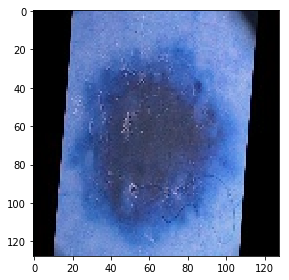

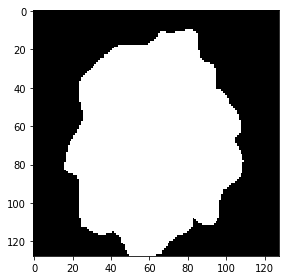

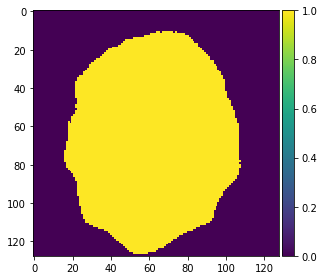

In [64]:
ix = random.randint(0, len(preds_train_t))
imshow(X_train[ix].astype(np.uint8))
plt.show()
imshow(np.squeeze(Y_train[ix]))
plt.show()
imshow(np.squeeze(preds_train_t[ix]))
plt.show()